# Libraries

In [1]:
from ultralytics import YOLO
from ultralytics import checks
from torchinfo import summary
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
from sklearn.model_selection import train_test_split
import os
import shutil

In [2]:
checks()

Ultralytics YOLOv8.2.78  Python-3.10.8 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
Setup complete  (12 CPUs, 7.8 GB RAM, 88.3/238.5 GB disk)


# Testing Model

## Detection

In [12]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

In [ ]:
res = model(source=0, show=True, conf=0.5)

In [6]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 932.1ms
Speed: 8.2ms preprocess, 932.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


In [8]:
res[0].show() #show the result

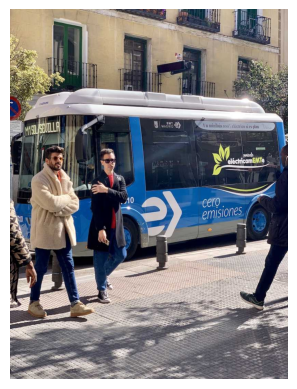

In [24]:
original_image = Image.open('bus.jpg')
plt.imshow(original_image)
plt.axis('off')
plt.show()

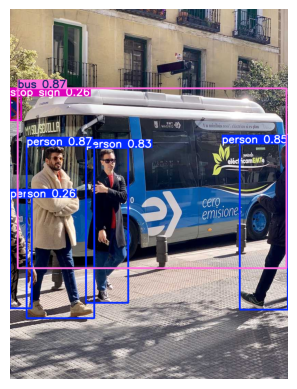

In [40]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

In [72]:
a = res[0]

## Classification

In [74]:
model = YOLO('yolov8n-cls.pt')

In [75]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 19.0ms
Speed: 15.0ms preprocess, 19.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


In [43]:
res[0].show()

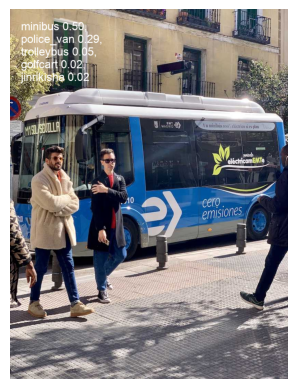

In [44]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Segmentation

In [45]:
model = YOLO('yolov8n-seg.pt')

 Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-seg.pt...
 Download failure, retrying 2/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-seg.pt...


In [46]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 65.2ms
Speed: 6.0ms preprocess, 65.2ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 480)


In [48]:
res[0].show()

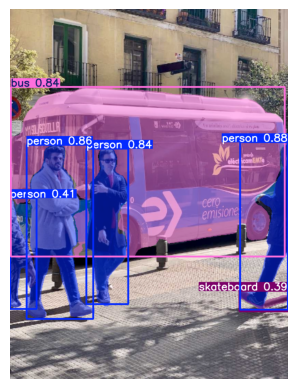

In [47]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Pose

In [49]:
model = YOLO('yolov8n-pose.pt') 

 Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n-pose.pt...


In [50]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 640x480 4 persons, 37.5ms
Speed: 6.0ms preprocess, 37.5ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 480)


In [51]:
res[0].show()

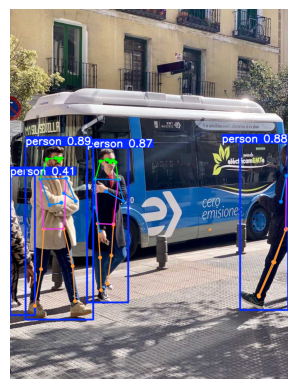

In [52]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

## Oriented Bounding Boxes (OBB)

In [53]:
model = YOLO('yolov8n-obb.pt')

100%|██████████| 6.26M/6.26M [00:22<00:00, 292kB/s] 


In [54]:
res = model('bus.jpg')


image 1/1 d:\Projects\Prjct\MyYOLO\bus.jpg: 1024x768 63.8ms
Speed: 7.0ms preprocess, 63.8ms inference, 25.0ms postprocess per image at shape (1, 3, 1024, 768)


In [55]:
res[0].show()

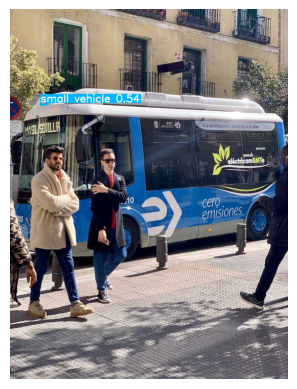

In [56]:
image_with_results = res[0].plot()
plt.imshow(cv2.cvtColor(image_with_results,cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

# Training

In [2]:
from ultralytics import YOLO
from torchinfo import summary
from roboflow import Roboflow

In [5]:
model = YOLO('yolov8n.pt')
summary(model)

Layer (type:depth-idx)                                  Param #
YOLO                                                    --
├─DetectionModel: 1-1                                   --
│    └─Sequential: 2-1                                  --
│    │    └─Conv: 3-1                                   (464)
│    │    └─Conv: 3-2                                   (4,672)
│    │    └─C2f: 3-3                                    (7,360)
│    │    └─Conv: 3-4                                   (18,560)
│    │    └─C2f: 3-5                                    (49,664)
│    │    └─Conv: 3-6                                   (73,984)
│    │    └─C2f: 3-7                                    (197,632)
│    │    └─Conv: 3-8                                   (295,424)
│    │    └─C2f: 3-9                                    (460,288)
│    │    └─SPPF: 3-10                                  (164,608)
│    │    └─Upsample: 3-11                              --
│    │    └─Concat: 3-12                           

In [ ]:
rf = Roboflow(api_key="iE0enKp1kDpA21G0Kzwz")
project = rf.workspace("my-test-1sijo").project("desk-sabxd")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
model.train(data='D:\Projects\Prjct\MyYOLO\desk\data.yaml', epochs=5, batch=5)

# Tracking

In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO('yolov8n.pt')

In [ ]:
model.track(source=0, show=True)

# Test Track

In [3]:
import cv2

In [245]:
cap = cv2.VideoCapture('C:/Users/Alireza/Desktop/Vivint_Outdoor_Camera_Pro_Sample_Footage_Driveway_Dayti_yWFv9eA72LA.mp4')

In [310]:
ret ,frame = cap.read()

In [247]:
frame.shape

(720, 1280, 3)

In [311]:
bbox = cv2.selectROI("Tracking", frame, False)

In [320]:
tracker = cv2.TrackerMIL_create()

In [321]:
tracker.init(frame, bbox)

In [322]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Update the tracker
    success, bbox = tracker.update(frame)

    if success:
        # Draw the bounding box on the frame
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
    else:
        cv2.putText(frame, "Tracking failed", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

    # Display the frame
    cv2.imshow("Tracking", frame)

    # Exit on ESC key
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

# test

In [26]:
with open('Mypic/0Q7A5200.jpg', "rb") as file:
    byte_data = file.read()

In [27]:
byte_data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xed3\x06Photoshop 3.0\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00\xf0\x00\x00\x00\x01\x00\x01\x00\xf0\x00\x00\x00\x01\x00\x018BIM\x04\x04\x00\x00\x00\x00\x02\xb8\x1c\x01Z\x00\x03\x1b%G\x1c\x02\x00\x00\x02\x00\x04\x1c\x02\x05\x00\'Work desk with laptop and working setup\x1c\x02\x19\x00\x05above\x1c\x02\x19\x00\raccessibility\x1c\x02\x19\x00\x05angle\x1c\x02\x19\x00\x05blank\x1c\x02\x19\x00\x08business\x1c\x02\x19\x00\x08computer\x1c\x02\x19\x00\x04desk\x1c\x02\x19\x00\x05diary\x1c\x02\x19\x00\x07digital\x1c\x02\x19\x00\x08directly\x1c\x02\x19\x00\x05empty\x1c\x02\x19\x00\x08handbook\x1c\x02\x19\x00\x04high\x1c\x02\x19\x00\x04home\x1c\x02\x19\x00\x07indoors\x1c\x02\x19\x00\x06laptop\x1c\x02\x19\x00\x04life\x1c\x02\x19\x00\x06nobody\x1c\x02\x19\x00\x08notebook\x1c\x02\x19\x00\x06office\x1c\x02\x19\x00\torganizer\x1c\x02\x19\x00\x03pen\x1c\x02\x19\x00\x08personal\x1c\x02\x19\x00\x05place\x1c\x02\x19\x00\x05plant\x1c

In [51]:
import io
from PIL import Image
from ultralytics import YOLO
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import base64

In [8]:
model = YOLO('yolov8n.pt')

In [28]:
a = io.BytesIO(byte_data)

In [29]:
b = Image.open(a)
if b.mode == 'RGBA': b = b.convert('RGB')

In [30]:
c = np.array(b)

In [31]:
c.shape

(390, 590, 3)

In [32]:
res = model(c)


0: 448x640 1 bowl, 1 potted plant, 1 dining table, 1 laptop, 1 book, 141.5ms
Speed: 8.5ms preprocess, 141.5ms inference, 100.2ms postprocess per image at shape (1, 3, 448, 640)


In [33]:
h,v = c.shape[:2]

In [34]:
(h, v)

(390, 590)

In [35]:
constant = 300

if v<h: 
    ratio = v/h
    d = cv2.resize(c,(int(constant*ratio), constant))
    print('0')
elif v>h: 
    ratio = h/v
    d = cv2.resize(c, (constant, int(constant*ratio)))
    print('1')
else:
    d = cv2.resize(c,(constant, constant))
    print('2')

1


In [36]:
r = model(c)


0: 448x640 1 bowl, 1 potted plant, 1 dining table, 1 laptop, 1 book, 111.8ms
Speed: 3.4ms preprocess, 111.8ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


In [37]:
m = cv2.cvtColor(r[0].plot(), cv2.COLOR_BGR2RGB)

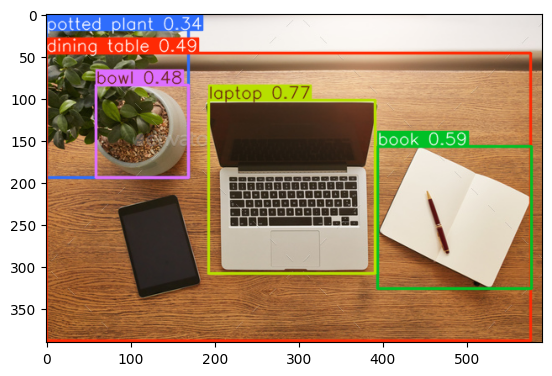

In [38]:
plt.imshow(r[0].plot())

In [39]:
v = cv2.imencode('.jpg', m)[1]

In [67]:
BytesIO = io.BytesIO(v.tobytes())

In [68]:
base64.b64encode(v.tobytes()).decode('utf-8')

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGGAk4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDysAk4Aor6Ri+K2r/AD9j/AOGvin4U+HdEsNf8Ratr0er+IrvRbe7u5IoJoAkSNOjCNMSc4G4lF+bHFTWvwg8C/H/xt8FfGWuaJDoE3xK1G8tfFNho8Itobt7S4CG4tYuViadTs2oAnmq21VHFf6Pvib2SlWxFLloqVWCkpXk

In [70]:
r[0].names[5]

'bus'

In [87]:
r[0].names[int(r[0].boxes[0].cls)]

'laptop'

In [71]:
r[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# Plate

In [21]:
from ultralytics import YOLO
from torchinfo import summary
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = YOLO('./weights/best(plate).pt')

In [4]:
summary(model)

Layer (type:depth-idx)                                       Param #
YOLO                                                         --
├─DetectionModel: 1-1                                        --
│    └─Sequential: 2-1                                       --
│    │    └─Conv: 3-1                                        (1,392)
│    │    └─Conv: 3-2                                        (41,664)
│    │    └─C2f: 3-3                                         (111,360)
│    │    └─Conv: 3-4                                        (166,272)
│    │    └─C2f: 3-5                                         (813,312)
│    │    └─Conv: 3-6                                        (664,320)
│    │    └─C2f: 3-7                                         (3,248,640)
│    │    └─Conv: 3-8                                        (1,991,808)
│    │    └─C2f: 3-9                                         (3,985,920)
│    │    └─SPPF: 3-10                                       (831,168)
│    │    └─Upsample: 3-11

In [219]:
image = cv2.imread('C:/Users/Alireza/Desktop/plate/2170593_FRONT.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [221]:
res = model(source=image, show=False, conf=0.6)


0: 416x640 2 plates, 258.3ms
Speed: 21.9ms preprocess, 258.3ms inference, 8.0ms postprocess per image at shape (1, 3, 416, 640)


In [222]:
bb = res[0].boxes

In [223]:
xy = bb.xyxy.cpu().numpy()

In [224]:
xy = np.array(bb.xyxy.cpu(), dtype=int)

In [225]:
cropped_image_0 = image[xy[0][1]:xy[0][3], xy[0][0]:xy[0][2]]
cropped_image_1 = image[xy[1][1]:xy[1][3], xy[1][0]:xy[1][2]]
gray_image_0 = cv2.cvtColor(cropped_image_0, cv2.COLOR_BGR2GRAY)
gray_image_1 = cv2.cvtColor(cropped_image_1, cv2.COLOR_BGR2GRAY)

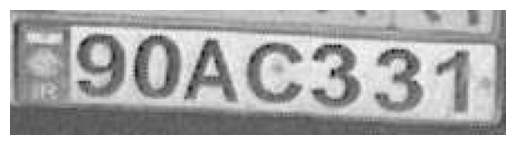

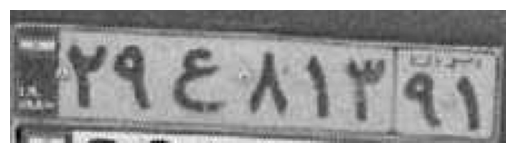

In [226]:
plt.imshow(gray_image_0, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(gray_image_1, cmap='gray')
plt.axis('off')
plt.show()

In [177]:
cv2.imshow('Grayscale Image', gray_image_0)

# Wait for a key press to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

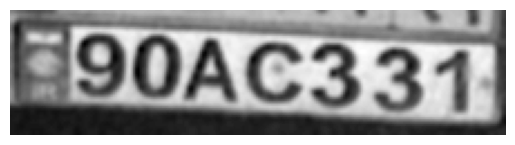

In [227]:
blurred = cv2.GaussianBlur(gray_image_0, (5, 5), 0)

plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

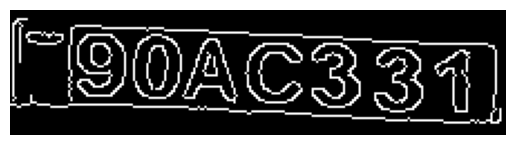

In [228]:
edges = cv2.Canny(blurred, 50, 150)

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

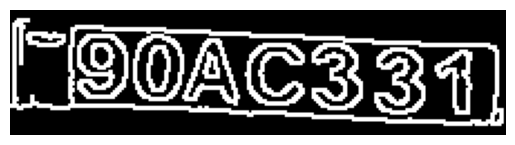

In [229]:
# Define a structuring element (kernel) for dilation
kernel_size = 2  # You can adjust this size
kernel = np.ones((kernel_size, kernel_size), np.uint8)  # Create a square kernel

# Apply dilation to thicken the edges
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(dilated_edges, cmap='gray')
plt.axis('off')
plt.show()

In [230]:
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

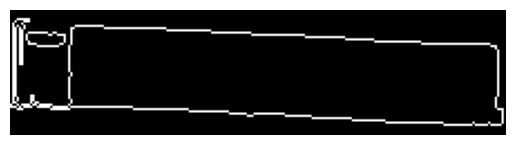

In [247]:
black_image = np.zeros_like(gray_image_0)
cv2.drawContours(black_image, contours, -1, (255, 255, 255), 1)  # White color for contours

plt.imshow(black_image, cmap='gray')
plt.axis('off')
plt.show()

In [232]:
for i in contours:
    print(cv2.contourArea(i))

87.0
6942.5


In [238]:
largest_contour = sorted(contours, key=cv2.contourArea, reverse=True)[0]

In [240]:
epsilon = 0.05 * cv2.arcLength(largest_contour, True)  # Adjust epsilon for accuracy
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

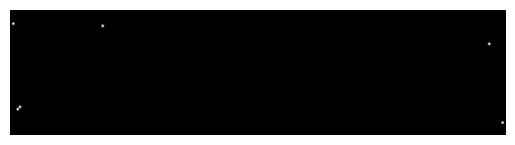

In [249]:
black_image = np.zeros_like(gray_image_0)
cv2.drawContours(black_image, approx, -1, (255, 255, 255), 1)  # White color for contours

plt.imshow(black_image, cmap='gray')
plt.axis('off')
plt.show()

In [291]:
image_height, image_width = gray_image_0.shape
top_left = np.array([0, 0])
top_right = np.array([image_width, 0])
bottom_left = np.array([0, image_height])
bottom_right = np.array([image_width, image_height])

# Calculate the L2 distances (Euclidean distance) for each corner
def l2_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Find the closest point to each corner
nearest_top_left = approx[np.argmin([l2_distance(pt, top_left) for pt in approx])]
nearest_top_right = approx[np.argmin([l2_distance(pt, top_right) for pt in approx])]
nearest_bottom_left = approx[np.argmin([l2_distance(pt, bottom_left) for pt in approx])]
nearest_bottom_right = approx[np.argmin([l2_distance(pt, bottom_right) for pt in approx])]

# Display the results
corners = {
    "Top Left": nearest_top_left[0],
    "Top Right": nearest_top_right[0],
    "Bottom Right": nearest_bottom_right[0],
    "Bottom Left": nearest_bottom_left[0]
}

corners

{'Top Left': array([1, 6], dtype=int32),
 'Top Right': array([214,  15], dtype=int32),
 'Bottom Right': array([220,  50], dtype=int32),
 'Bottom Left': array([ 3, 44], dtype=int32)}

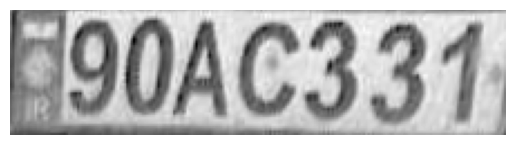

In [295]:
dst_points = np.array([[0, 0], [image_width, 0], [image_width, image_height], [0, image_height]], dtype=np.float32)
src_points  = np.array(list(corners.values()), dtype=np.float32)

M = cv2.getPerspectiveTransform(src_points, dst_points)
rectified_image = cv2.warpPerspective(gray_image_0, M, (image_width, image_height))

plt.imshow(rectified_image, cmap='gray')
plt.axis('off')
plt.show()

In [293]:
src_points

array([[          1,           6],
       [        214,          15],
       [        220,          50],
       [          3,          44]], dtype=float32)

In [294]:
dst_points

array([[          0,           0],
       [        222,           0],
       [        222,          56],
       [          0,          56]], dtype=float32)